# (Homework) Week 7 - DataScience Bootcamp Fall 2025


**Name:** Yasamin Esmaeili

**Email:** ye2040@nyu.edu


## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 0 sixes out of 10 rolls
P(A | 0 sixes) = 0.925
P(B | 0 sixes) = 0.075
P(C | 0 sixes) = 0.000
True die: A


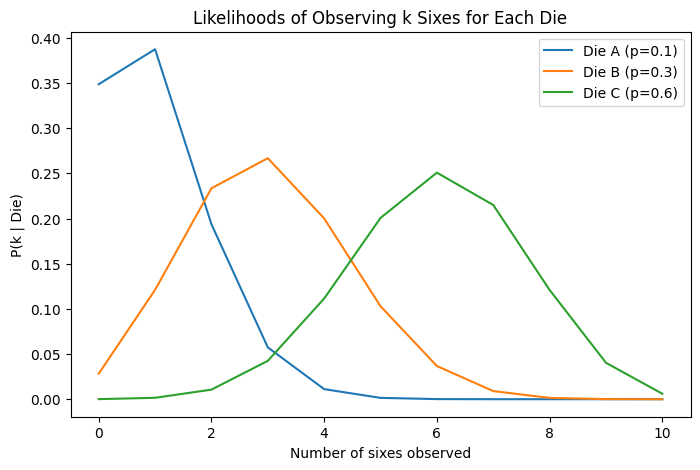

Accuracy over 100 rounds: 0.73


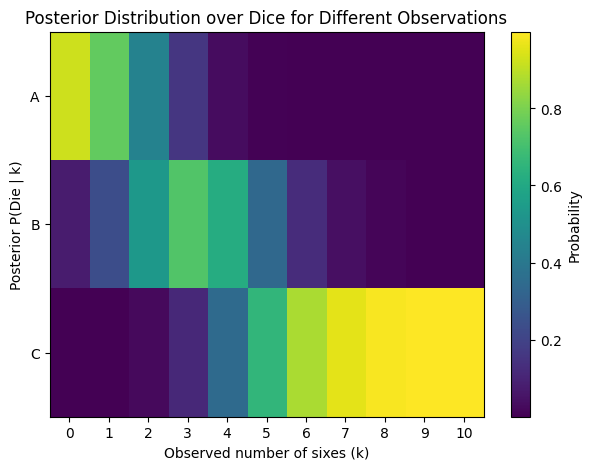

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = 1/3
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    # Pick a die
    true_die = np.random.choice(dice_names)
    p = dice_probs[true_die]
    return true_die, np.random.binomial(n_rolls, p)

def posterior_given_k(k):
    # Compute posterior probabilities P(Die | k sixes)
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[die]) for die in dice_names])
    numerators = likelihoods * prior

    # Handle zero denominator case
    if sum(numerators) == 0:
        return np.zeros(len(dice_names))
    
    return numerators / sum(numerators)

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [2]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
#theta = (X^T X)^-1 X^T y  (Normal Equation)
theta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ theta
mse_linear = np.mean((y - y_pred) ** 2)
print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [5. 0.] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Alpha = 0.0025 (1/400):
Step 0: w = 13.0000, f(w) = 80.0000
Step 1: w = 12.6000, f(w) = 32.7680
Step 2: w = 12.3952, f(w) = 18.9459
Step 3: w = 12.2594, f(w) = 12.5786
Step 4: w = 12.1595, f(w) = 9.0385
-----------------------------------
Alpha = 2.5e-07 (1/4000000):
Step 0: w = 13.0000000, f(w) = 80.0000000
Step 1: w = 12.9999600, f(w) = 79.9936002
Step 2: w = 12.9999200, f(w) = 79.9872012
Step 3: w = 12.9998800, f(w) = 79.9808029
Step 4: w = 12.9998400, f(w) = 79.9744054
-----------------------------------


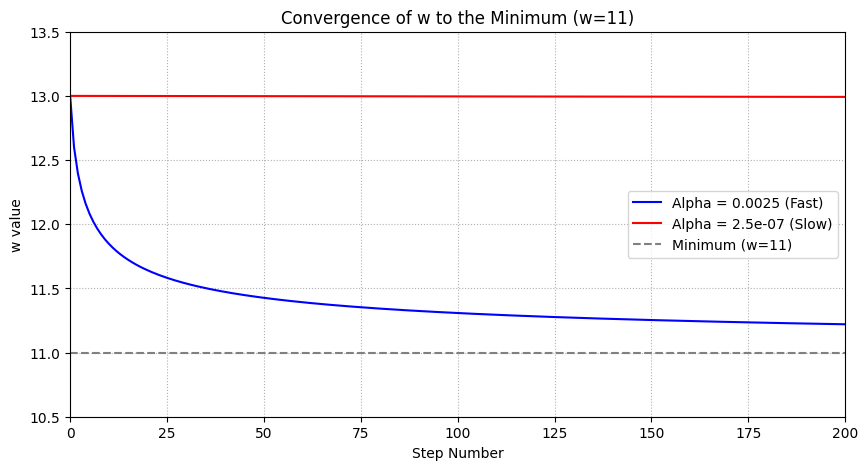

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w_all = [w0]
    w = w0
    for _ in range(steps):
        # Compute gradient (derivative of MSE)
        gradient = 20 * (w - 11)**3
        # Update weight
        w = w - alpha * gradient
        w_all.append(w)
    
    return w_all

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print and Plot
# Print the first 5 steps of the large alpha level (Fast convergence)
print(f"Alpha = {1/400} (1/400):")
for i in range(min(5, len(hist_140))):
    print(f"Step {i}: w = {hist_140[i]:.4f}, f(w) = {(5*(hist_140[i]-11)**4):.4f}")

print("-" * 35)

# Print the first 5 steps of the small alpha level (Slow convergence)
print(f"Alpha = {1/4000000} (1/4000000):")
for i in range(min(5, len(hist_180))):
    print(f"Step {i}: w = {hist_180[i]:.7f}, f(w) = {(5*(hist_180[i]-11)**4):.7f}")

print("-" * 35)

# Plotting the convergence in the parameter space (w)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(hist_140)), hist_140, label=f'Alpha = {1/400} (Fast)', color='blue')
plt.plot(np.arange(len(hist_180)), hist_180, label=f'Alpha = {1/4000000} (Slow)', color='red')

plt.axhline(y=11, color='gray', linestyle='--', label='Minimum (w=11)')
plt.xlim(0, 200) # Zoom in to see the rapid change for the fast alpha
plt.ylim(10.5, 13.5)
plt.xlabel('Step Number')
plt.ylabel('w value')
plt.title(f'Convergence of w to the Minimum (w=11)')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

ALL THE BEST!